Description: You need to code a simple trading strategy in a Jupyter Notebook as per the
given requirements:
1. Define a Class ScriptData which can fetch US Stock data using Alpha Vantage.
[Use this link to get your FREE API Key].
The class should implement the following methods:
a. fetch_intraday_data: (method arguments: script)
Fetches intraday data for given “script” (Example for script: “GOOGL”,
“AAPL”) and stores as it is.
b. convert_intraday_data: (method arguments: script)
Converts fetched intraday data (in point a.) as a pandas DataFrame
(hereafter referred as “df”) with the following columns:
i.
timestamp (data type: pandas.Timestamp)
ii.
open (data type: float)
iii.
high (data type: float)
iv.
low(data type: float)
v.
close (data type: float)
vi.
volume (data type: int)
c. Additional methods for overloading the following operations:
i.
getitem
ii.
setitem
iii.
contains
Sample code showing how the above class will be used:

In [172]:
import pandas as pd
import requests

class ScriptData:
    ALPHA_VANTAGE_API_KEY = 'UASNK34P66SOEG54'
    INTRADAY_API_URL = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={}&interval=5min&apikey={}'

    def __init__(self, script_name):
        self.script_name = script_name
    

    def fetch_intraday_data(self):
        url = self.INTRADAY_API_URL.format(self.script_name, self.ALPHA_VANTAGE_API_KEY)
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()['Time Series (5min)']
        else:
            print('Error fetching data. Status code:', response.status_code)

    def convert_intraday_data(self):
        intraday_data = self.fetch_intraday_data()
        if intraday_data is None:
            return None

        data = []
        for timestamp, values in intraday_data.items():
            data.append({
                'timestamp': pd.Timestamp(timestamp),
                'open': float(values['1. open']),
                'high': float(values['2. high']),
                'low': float(values['3. low']),
                'close': float(values['4. close']),
                'volume': int(values['5. volume'])
            })

        df = pd.DataFrame(data)
        return df

    def __getitem__(self, key):
        return self.data[key]

    def __setitem__(self, key, value):
        self.data[key] = value

    def __contains__(self, key):
        return key in self.data

    def load_data(self, script):
        self.data = self.convert_intraday_data(script)
        
    

In [173]:
script_data = ScriptData('GOOGL')
script_data.fetch_intraday_data()
df = script_data.convert_intraday_data()
df

,timestamp,open,high,low,close,volume
0,2023-02-14 20:00:00,94.180,94.1800,94.110,94.1200,9174
1,2023-02-14 19:55:00,94.230,94.2300,94.180,94.1800,2882
2,2023-02-14 19:50:00,94.240,94.2400,93.500,93.5000,15924
3,2023-02-14 19:45:00,94.260,94.2899,94.200,94.2000,5486
4,2023-02-14 19:40:00,94.260,94.3200,94.250,94.3200,5043
...,...,...,...,...,...,...
95,2023-02-14 12:00:00,92.460,92.7300,92.450,92.6607,368689
96,2023-02-14 11:55:00,92.550,92.5700,92.270,92.4679,385199
97,2023-02-14 11:50:00,92.330,92.6300,92.305,92.5500,683503
98,2023-02-14 11:45:00,92.360,92.4550,92.260,92.3531,604495


In [174]:
script_data = ScriptData('AAPL')
script_data.fetch_intraday_data()
df1 = script_data.convert_intraday_data()
df1

,timestamp,open,high,low,close,volume
0,2023-02-14 20:00:00,152.79,152.850,152.76,152.84,9429
1,2023-02-14 19:55:00,152.75,152.770,152.73,152.77,3596
2,2023-02-14 19:50:00,152.75,152.760,152.70,152.71,4770
3,2023-02-14 19:45:00,152.84,152.870,152.75,152.76,7379
4,2023-02-14 19:40:00,152.87,152.870,152.84,152.84,1795
...,...,...,...,...,...,...
95,2023-02-14 12:00:00,151.56,151.830,151.36,151.70,518882
96,2023-02-14 11:55:00,151.53,151.600,151.17,151.55,496456
97,2023-02-14 11:50:00,151.13,151.720,151.10,151.54,494145
98,2023-02-14 11:45:00,151.35,151.386,151.04,151.14,490943


# 2. Define a function called indicator1. It should take “df” and ‘timeperiod’ (integer) as
inputs and give another pandas DataFrame as an output with two columns:
a. timestamp: Same as ‘timestamp’ column in ‘df’
b. indicator: Moving Average of the ‘close’ column in ‘df’. The number of
elements to be taken for a moving average is defined by ‘timeperiod’. For
example, if ‘timeperiod’ is 5, then each row in this column will be an average
of total 5 previous values (including current value) of the ‘close’ column.
Some sample code has been given below which shows how the above function will be used:

In [175]:
def indicator1(df, timeperiod):
    ma = df['close'].rolling(window=timeperiod).mean()
    result_df = pd.DataFrame({
        'timestamp': df['timestamp'],
        'indicator': ma
    })
    return result_df

In [176]:
indicator1(df,5)

,timestamp,indicator
0,2023-02-14 20:00:00,NaN
1,2023-02-14 19:55:00,NaN
2,2023-02-14 19:50:00,NaN
3,2023-02-14 19:45:00,NaN
4,2023-02-14 19:40:00,94.06400
...,...,...
95,2023-02-14 12:00:00,92.79670
96,2023-02-14 11:55:00,92.69828
97,2023-02-14 11:50:00,92.60128
98,2023-02-14 11:45:00,92.53490


In [177]:
indicator1(df1,5)

,timestamp,indicator
0,2023-02-14 20:00:00,NaN
1,2023-02-14 19:55:00,NaN
2,2023-02-14 19:50:00,NaN
3,2023-02-14 19:45:00,NaN
4,2023-02-14 19:40:00,152.784
...,...,...
95,2023-02-14 12:00:00,151.840
96,2023-02-14 11:55:00,151.746
97,2023-02-14 11:50:00,151.660
98,2023-02-14 11:45:00,151.522


# 3. Define a class Strategy, which can do the following, given a script name:
a. Fetch intraday historical day (‘df’) using ScriptData class.
We’ll refer to the ‘close’ column of ‘df’ as close_data.
b. Compute indicator data on ‘close’ of ‘df’ using indicator1 function.
We’ll refer to the ‘indicator’ column of this data as indicator_data.
c. Generate a pandas DataFrame called ‘signals’ with 2 columns:
i.
‘timestamp’: Same as ‘timestamp’ column in ‘df’
ii.
‘signal’: This column can have the following values:
1. BUY (When: If indicator_data cuts close_data upwards)
2. SELL (When: If indicator_data cuts close_data downwards)
3. NO_SIGNAL (When: If indicator_data and close_data don’t cut
each other)
Example of ‘Cut Upwards’, ‘Cut Downwards’, ‘Do not cut each
other’:
As an example, for the below graph, if the RED line is
close_data and GREY line is indicator_data, then:
1. The BLUE points represent the instances when
indicator_data has cut close_data ‘downwards’
2. The PINK points represent the instances when
indicator_data has cut close_data ‘upwards
3. The YELLOW points represent when indicator_data
and close_data don’t cut each other.
So, there will be SELL signal for BLUE timestamps, ‘BUY’
signal for PINK timestamp and ‘NO_SIGNAL’ for yellow
timestamps.d. Print the ‘signals’ DataFrame with only those rows where the signal is either
‘BUY’ or ‘SELL’.

In [183]:
import pandas as pd
import pyalgotrading as algo

class Strategy:
    def __init__(self, script):
        self.script = script
        self.script_data = ScriptData(script)
    
    def get_script_data(self):
        intraday_data = self.script_data.convert_intraday_data()
        df = self.script_data.convert_intraday_data()
        return df
    
    def generate_signals(self, timeperiod):
        # Step 1: Fetch intraday historical day (‘df’) using ScriptData class
        df = self.get_script_data()

        # Step 2: Compute indicator data on ‘close’ of ‘df’ using indicator1 function
        indicator_data = self.indicator1(df, timeperiod)

        # Step 3: Generate signals based on indicator and close data
        signals = pd.DataFrame({
            'timestamp': df['timestamp'],
            'signal': 'NO_SIGNAL'
        })
        signals.loc[indicator_data['indicator'] > df['close'], 'signal'] = 'BUY'
        signals.loc[indicator_data['indicator'] < df['close'], 'signal'] = 'SELL'
        
        # Step 4: Print the ‘signals’ DataFrame with only those rows where the signal is either ‘BUY’ or ‘SELL’.
        print(signals[signals['signal'].isin(['BUY', 'SELL'])])
        
    def indicator1(self, df, timeperiod):
        ma = df['close'].rolling(window=timeperiod).mean()
        result_df = pd.DataFrame({
            'timestamp': df['timestamp'],
            'indicator': ma
        })
        return result_df


In [187]:
str = Strategy('NVDA')
signals = str.generate_signals(4)
signals

             timestamp signal
3  2023-02-14 19:45:00   SELL
4  2023-02-14 19:40:00   SELL
5  2023-02-14 19:35:00   SELL
6  2023-02-14 19:30:00   SELL
7  2023-02-14 19:25:00    BUY
..                 ...    ...
95 2023-02-14 12:05:00    BUY
96 2023-02-14 12:00:00    BUY
97 2023-02-14 11:55:00    BUY
98 2023-02-14 11:50:00    BUY
99 2023-02-14 11:45:00    BUY

[97 rows x 2 columns]


In [185]:
df2 = str.get_script_data()

,timestamp,open,high,low,close,volume
0,2023-02-14 20:00:00,228.30,228.56,228.3000,228.4300,11997
1,2023-02-14 19:55:00,228.50,228.55,228.3000,228.3500,12991
2,2023-02-14 19:50:00,228.63,228.64,228.4100,228.5000,6183
3,2023-02-14 19:45:00,228.66,228.70,228.5000,228.5000,9162
4,2023-02-14 19:40:00,228.65,228.65,228.5500,228.5600,2182
...,...,...,...,...,...,...
95,2023-02-14 12:05:00,224.67,225.18,224.4400,224.6800,523940
96,2023-02-14 12:00:00,223.44,224.94,223.4300,224.6562,643498
97,2023-02-14 11:55:00,223.67,223.77,222.8350,223.4900,461262
98,2023-02-14 11:50:00,223.19,224.12,222.9632,223.7200,641816


In [216]:
high = df['high']
low = df['low']
timestamp =df['timestamp']

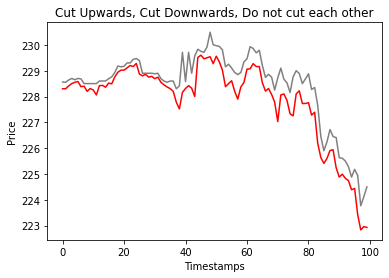

In [224]:
import matplotlib.pyplot as plt

# define close_data and indicator_data
script_data = ScriptData('NVDA')
script_data.fetch_intraday_data()
DF = script_data.convert_intraday_data()

close_data = DF['close']
indicator_data = indicator1(DF,5)

# initialize a figure
fig, ax = plt.subplots()

# plot close_data and indicator_data
ax.plot(low, color='red')
ax.plot(high, color='grey')

# mark the points where indicator_data has cut close_data
# for i in range(1, len(close_data)):
#     if indicator_data[i-1] > close_data[i-1] and indicator_data[i] < close_data[i]:
#         ax.scatter(i, close_data[i], color='blue', marker='v')
#     elif indicator_data[i-1] < close_data[i-1] and indicator_data[i] > close_data[i]:
#         ax.scatter(i, close_data[i], color='pink', marker='^')
#     else:
#         ax.scatter(i, close_data[i], color='yellow', marker='o')

# add labels and title
ax.set_xlabel('Timestamps')
ax.set_ylabel('Price')
ax.set_title('Cut Upwards, Cut Downwards, Do not cut each other')

# show the plot
plt.show()
